In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
filepath = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
df = pd.read_excel(filepath)
print(df.head())



  2023 Passenger Rank Airport Code                              Airport Name  \
0                   1          LAX                 Los Angeles International   
1                   2          ORD              Chicago O'Hare International   
2                   3          DEN                      Denver International   
3                   4          ATL  Hartsfield-Jackson Atlanta International   
4                   5          EWR              Newark Liberty International   

        City Name State Name  Average Fare ($)  \
0     Los Angeles         CA        416.689079   
1  Chicago-O'Hare         IL        388.547245   
2          Denver         CO        357.584087   
3         Atlanta         GA        400.396089   
4          Newark         NJ        426.741235   

   Inflation Adjusted Average Fare ($) (Base Quarter:  Q4-2023)  \
0                                         416.689079              
1                                         388.547245              
2                

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Load the Excel file, explicitly setting column names and ignoring the existing header
filepath = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
df = pd.read_excel(filepath, header=None)  # 'header=0' if the first row is headers and you want to replace them

# Step 2: Load Data
def load_data(filepath):
    """Load an Excel file into a pandas DataFrame."""
    return pd.read_excel(filepath)

# Step 3: Transform Data
def transform_data(df):
    """Perform data transformations such as handling missing values or deriving new columns."""
    df.fillna(method='ffill', inplace=True)  # Example: forward fill missing values
    return df

# Step 4: Summarize Data
def summarize_data(df):
    """Generate basic summaries or statistics."""
    summary = df.describe()  # Example: Summary statistics
    return summary


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# number of airports in a city
def visualize_data(df):

  # Load the dataset (make sure to use the correct file path)
  file_path = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
  df = pd.read_excel(file_path)


  # Count the number of airports per city
  airports_per_city = df['City Name'].value_counts()

  # Select the top N cities with the most airports for better readability
  top_cities = airports_per_city.head(20)  # Adjust N here

  # Create a horizontal bar chart for the number of airports per city
  plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
  top_cities.plot(kind='barh')

  # Set title and labels
  plt.title('Number of Airports in Top 20 Cities')
  plt.xlabel('Number of Airports')
  plt.ylabel('City Name')

  # Invert the y-axis to have the city with the most airports on top
  plt.gca().invert_yaxis()

  # Show the plot
  plt.tight_layout()  # Adjust the padding of the figure
  plt.show()

## frequency of fares
def visualize_fares(df):

  # Make sure the 'Average Fare ($)' column is in a numerical format
  df['Average Fare ($)'] = pd.to_numeric(df['Average Fare ($)'], errors='coerce')

  # Create a histogram for the 'Average Fare ($)' column
  plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  plt.hist(df['Average Fare ($)'].dropna(), bins=30, edgecolor='black')  # Adjust the number of bins as needed

  # Set title and labels
  plt.title('Distribution of Average Fares')
  plt.xlabel('Average Fare ($)')
  plt.ylabel('Frequency')

  # Show the plot
  plt.tight_layout()  # Adjust the padding of the figure
  plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def grouped_bar_passengers(df, state_name='CA', top_n=5):
    # Filter the DataFrame for a specific state
    state_df = df[df['State Name'] == state_name]

    # Aggregate passenger numbers for each airport and city
    city_airport_passengers = state_df.groupby(['City Name', 'Airport Code'])['2023 Passengers (10% sample)'].sum().reset_index()

    # Find the top N cities based on total passenger numbers
    top_cities = city_airport_passengers.groupby('City Name')['2023 Passengers (10% sample)'].sum().nlargest(top_n).index

    # Filter data to only include top N cities
    top_city_airport_passengers = city_airport_passengers[city_airport_passengers['City Name'].isin(top_cities)]

    # Pivot data for plotting
    pivot_data = top_city_airport_passengers.pivot(index='City Name', columns='Airport Code', values='2023 Passengers (10% sample)')

    # Plot
    ax = pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)  # Smaller figure size and adjusted bar width

    # Format the y-axis to show values in millions
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.1f}M'.format(x/1e6)))

    # Set labels and title
    ax.set_xlabel('City Name', fontsize=12)
    ax.set_ylabel('Passenger Numbers (in millions)', fontsize=12)
    ax.set_title('Top 5 Cities Passenger Numbers by Airport within State CA', fontsize=14)

    # Set tick parameters
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Add note about the y-axis units
    ax.text(x=0.5, y=1.1, s='Values on the y-axis are in millions', ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


def bubble_passengers_cities(df, state_name='CA', top_n=5):
    # Filter the DataFrame for the specified state
    state_df = df[df['State Name'] == state_name]

    # Calculate the total passenger numbers for each city and get the top 5
    top_cities = state_df.groupby('City Name')['2023 Passengers (10% sample)'].sum().nlargest(top_n).reset_index()

    # Filter the DataFrame to include only the top cities
    top_cities_df = state_df[state_df['City Name'].isin(top_cities['City Name'])]

    # Scale the '2023 Passengers (10% sample)' to a reasonable size for bubbles
    top_cities_df['Passenger Size'] = top_cities_df['2023 Passengers (10% sample)'] / top_cities_df['2023 Passengers (10% sample)'].max() * 1000

    # Create the bubble chart
    plt.figure(figsize=(12, 8))
    plt.scatter(top_cities_df['Average Fare ($)'], top_cities_df['City Name'], s=top_cities_df['Passenger Size'], alpha=0.5)

    # Set title and axis labels
    plt.title('Bubble Chart of Passengers and Fares by City for Top 5 Cities in CA')
    plt.xlabel('Average Fare ($)')
    plt.ylabel('City Name')

    # Show the plot
    plt.show()


       Average Fare ($)  \
count        438.000000   
mean         474.483391   
std          163.633163   
min           83.000000   
25%          390.097380   
50%          480.454126   
75%          554.161942   
max         1526.508011   

       Inflation Adjusted Average Fare ($) (Base Quarter:  Q4-2023)  \
count                                         438.000000              
mean                                          475.826884              
std                                           163.697091              
min                                            83.000000              
25%                                           391.901354              
50%                                           482.318529              
75%                                           556.483684              
max                                          1526.508011              

       2023 Passengers (10% sample)  
count                  4.380000e+02  
mean                   7.654670e+04  
st

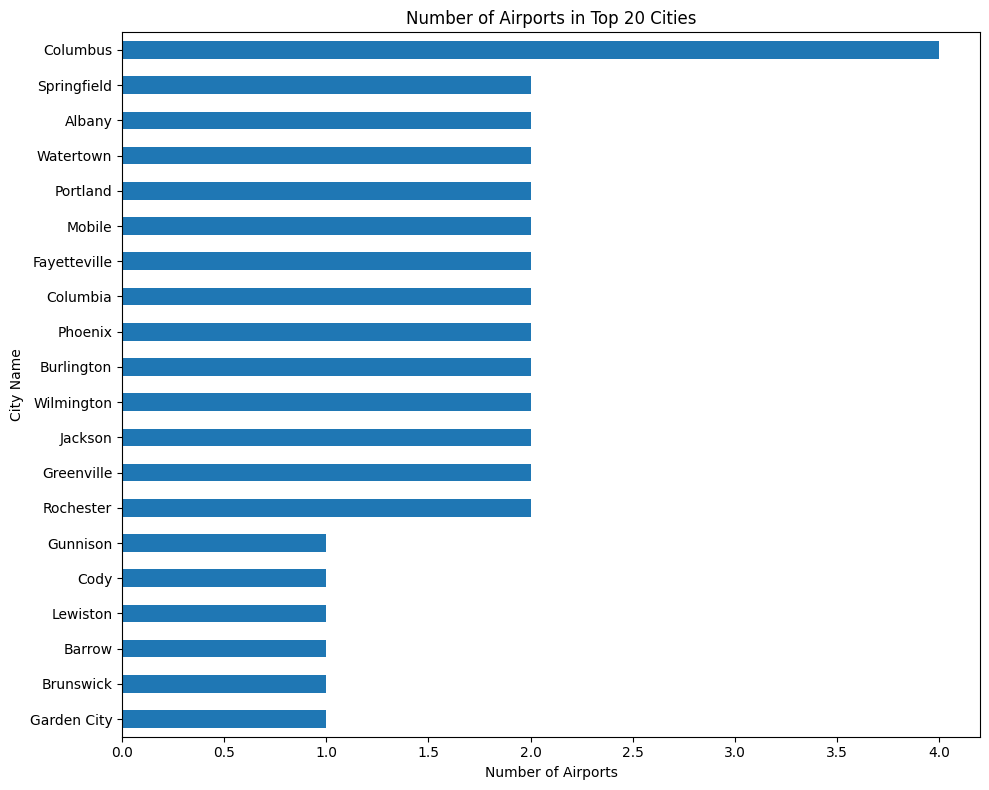

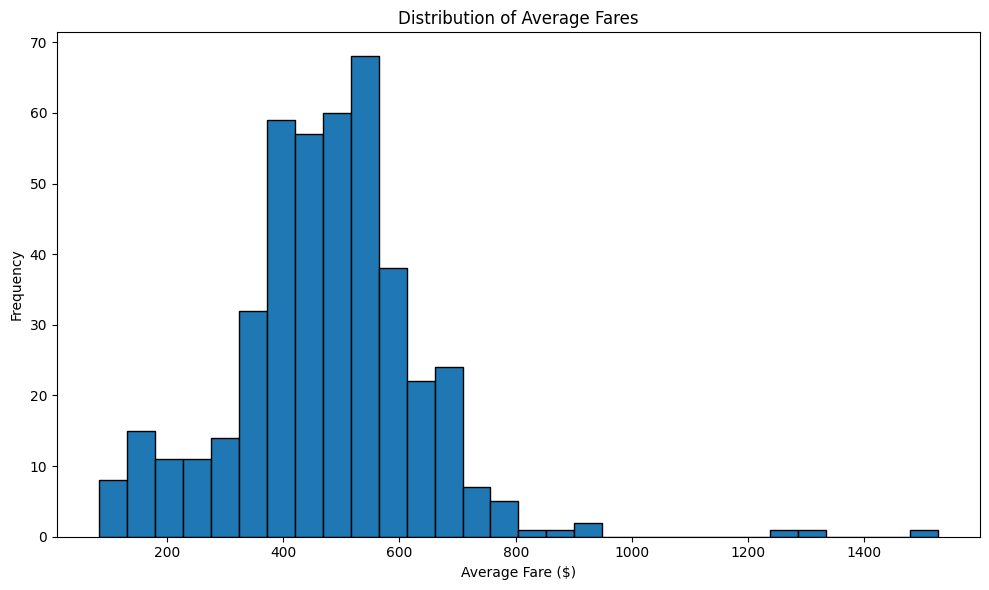

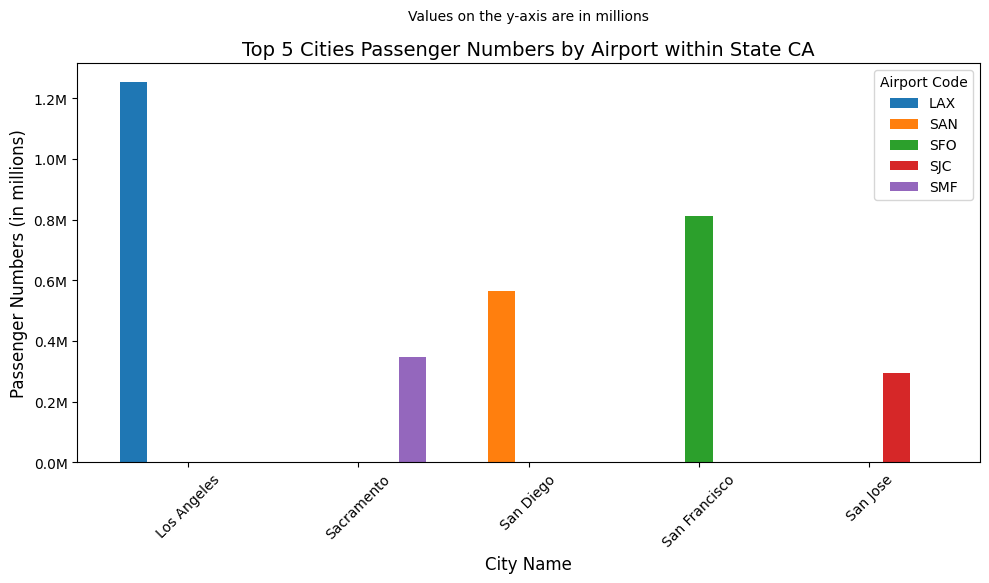

<ipython-input-52-d907f5f3846b>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities_df['Passenger Size'] = top_cities_df['2023 Passengers (10% sample)'] / top_cities_df['2023 Passengers (10% sample)'].max() * 1000


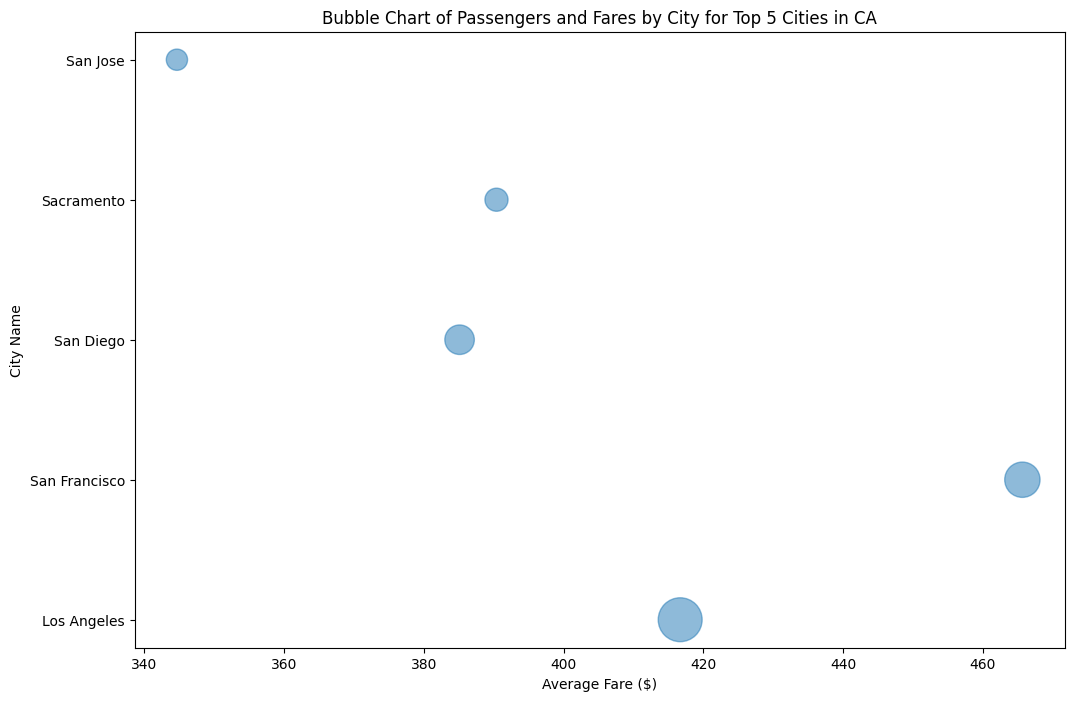

In [53]:
# Main function to run the pipeline
def run_pipeline(filepath):
    df = load_data(filepath)
    df = transform_data(df)
    summary = summarize_data(df)
    print(summary)
    visualize_data(df)
    visualize_fares(df)
    grouped_bar_passengers(df)
    bubble_passengers_cities(df)



file_path = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'

# Run the pipeline
run_pipeline(file_path)